# Tutorial
## Visualization of structures and calculation of radial distribution function

In [1]:
# Load libraries
!pip install -q numpy matplotlib ase
import numpy as np
import matplotlib.pyplot as plt
import ase.io as aseio
from ase.geometry.analysis import Analysis
from ase.visualize import view

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Use ASE to load and edit trajectories
We start from a trajectory of a molecular dynamics simulation of water at around room temperature and atmospheric pressure. The simulation was carried out using a machine learning model for the interatomic interactions.

In [2]:
# Read file
!git clone https://github.com/PabloPiaggi/nanogune-winter-school-2025
filename = "nanogune-winter-school-2025/tutorial-3/radial-distribution-function/simulation/water.lammps-dump-text"
traj = aseio.read(filename,format='lammps-dump-text',index=":")
# Set correct atoms names
for frame in traj:
    symbols=np.array(frame.get_chemical_symbols())
    symbols[symbols=='Be']='O'
    symbols[symbols=='B']='H'
    frame.set_chemical_symbols(symbols)

## Visualize the trajectory
Rotate, zoom in, and understand the structure of the atoms in the trajectory.

In [3]:
view(traj[0],viewer='x3d')

## Compute the oxygen-oxygen g(r) using the trajectory.
The g(r) is the average number of neighbors at a distance $r$ divided by the number of neighbors expected in a uniform, non-interacting fluid of the same density.

Formally, we can write,
$ g(r) = \frac{\langle \delta(r-r') \rangle}{\langle \delta(r-r') \rangle_{IG}}  = \frac{\langle W(r-r') \rangle}{ 4 \pi \rho r^2 \: \Delta r} $

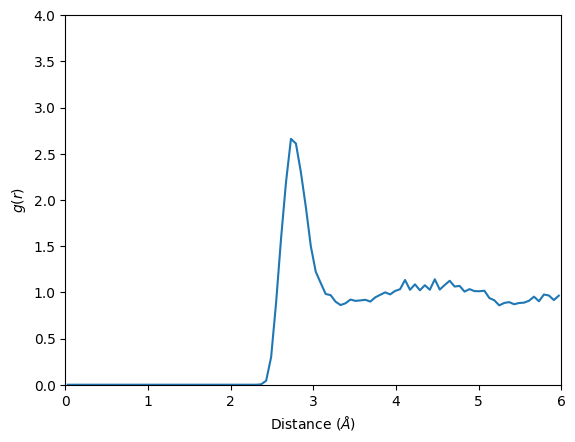

In [4]:
rdf_OO = []
rmax = 6
nbins = 100
max_configurations=100
step=10
for atoms in traj[0:max_configurations:step]:
    ana = Analysis(atoms)
    #print(atoms.get_chemical_symbols())
    dummy = ana.get_rdf(rmax,nbins,return_dists=True,elements=['O'])
    rdf_OO.append(dummy[0][0])
    r = dummy[0][1]
plt.plot(r,np.mean(rdf_OO,axis=0))

plt.xlim([0,6])
plt.ylim([0,4])
plt.xlabel(r"Distance ($\AA$)")
plt.ylabel(r"$g(r)$")

plt.show()

## EXERCISE
Compute the $g(r)$ for the hydrogen-hydrogen pairs and the oxygen-hydrogen pairs. Discuss the nature of the bonds and what we learn about the structure of the fluid.

TIP: For the OH g(r) use ```elements=(1,2)```